Import potrzebnych bibliotek

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import models
from keras import layers
from keras import Sequential

Wczytanie danych z podziałem na zbiór treningowy i testowy

In [2]:
(train_img, train_lbl), (test_img, test_lbl) = tf.keras.datasets.fashion_mnist.load_data()

Eksploracja danych i ich rozkładu

In [3]:
train_img.shape

(60000, 28, 28)

In [4]:
np.unique(train_lbl)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [5]:
test_img.shape

(10000, 28, 28)

Wyświetlenie obrazu

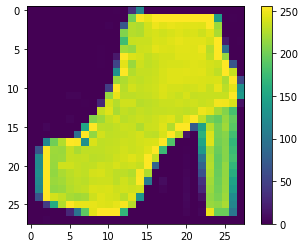

In [6]:
plt.figure()
plt.imshow(train_img[44])
plt.colorbar()

Stworzenie listy klas ubrań

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Przeskalowanie danych

In [8]:
train_img = train_img / 255.0
test_img = test_img / 255.0

Sprawdzenie poprawności formatu obrazów i nazw klas pod każdym z nich

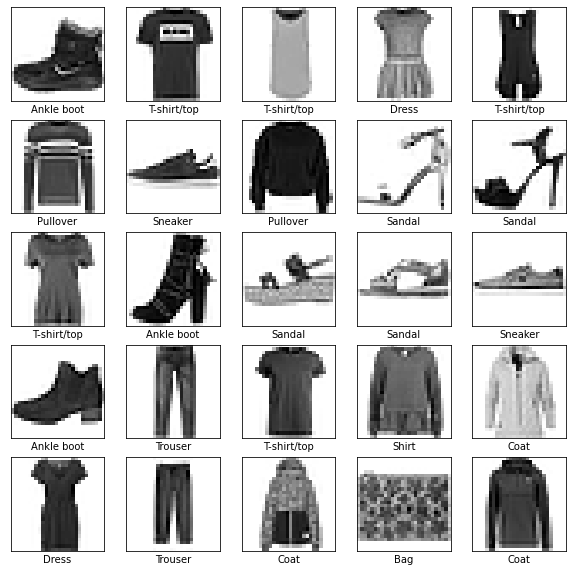

In [9]:
plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_img[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[train_lbl[i]])

Konfigurowanie modelu i jego warstw

In [10]:
model = Sequential()
model.add(layers.Conv2D(filters = 32, kernel_size = (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 10)                1

Kompilacja modelu - wybór optymalizatora, funkcji straty oraz metryki

In [11]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

Trenowanie modelu przez wybraną liczbę epok danymi ze zbiorów treningowych

In [12]:
model.fit(train_img, train_lbl, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.4751 - accuracy: 0.8297
Epoch 2/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.3326 - accuracy: 0.8805
Epoch 3/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2896 - accuracy: 0.8935
Epoch 4/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2622 - accuracy: 0.9050
Epoch 5/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.2389 - accuracy: 0.9129
Epoch 6/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.2232 - accuracy: 0.9182
Epoch 7/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.2078 - accuracy: 0.9226
Epoch 8/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1969 - accuracy: 0.9273
Epoch 9/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.1869 - accuracy: 0.9319
Epoch 10/10
1875/1875 [==============================] - 39s 21m

1/1 [==============================] - 0s 71ms/step


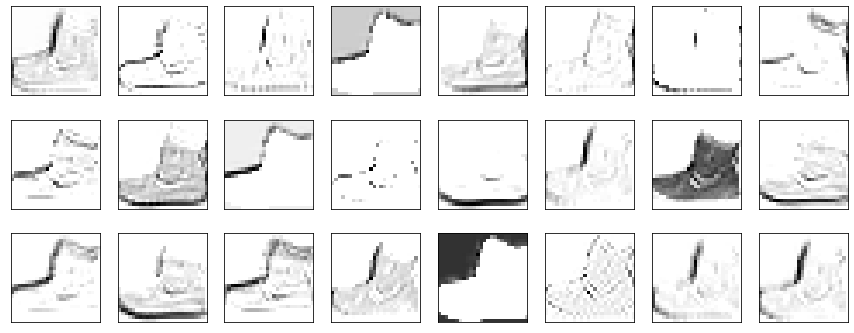

In [13]:
layer_name = 'conv2d' 
layer_dict = {layer.name : layer for layer in model.layers}
modelslice = tf.keras.Model(inputs=model.inputs, outputs=layer_dict[layer_name].output)
image = train_img[0] 
image = np.expand_dims(image, axis=0)
feature_maps = modelslice.predict(image)
plt.figure(figsize=(15, 8))
    
for i in range(24):
    plt.subplot(4,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(feature_maps[0, :, :, i-1], cmap=plt.cm.binary)

Ocena dokładności modelu

In [14]:
test_loss, test_acc = model.evaluate(test_img, test_lbl)

313/313 [==============================] - 2s 6ms/step - loss: 0.2639 - accuracy: 0.9110


Prognozowanie obrazów

In [15]:
predictions = model.predict(test_img)

313/313 [==============================] - 2s 6ms/step


In [16]:
predictions[0]
np.argmax(predictions[0])

9

Pełny zestaw prognoz 10 klas

In [17]:
def plot_img(i, pred_arr, true_lbl, img):
    pred_arr, true_lbl, img = pred_arr, true_lbl[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap = plt.cm.binary)
    predicted_label = np.argmax(pred_arr)
    if predicted_label == true_lbl:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(pred_arr),
                                         class_names[true_lbl]),
                                         color = color)
    
def plot_value_array(i, pred_arr, true_lbl):
    pred_arr, true_lbl = pred_arr, true_lbl[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), pred_arr, color = "#777777")
    plt.ylim([0,1])
    pred_label = np.argmax(pred_arr)
    
    thisplot[pred_label].set_color('red')
    thisplot[true_lbl].set_color('green')

Przykładowa prognoza

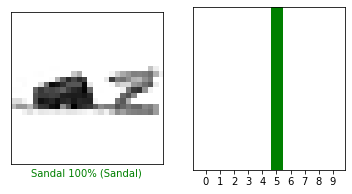

In [18]:
i = 420
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_img(i, predictions[i], test_lbl, test_img)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_lbl)

Wyświetlanie i prognozowanie wybranej wielkości listy obrazów

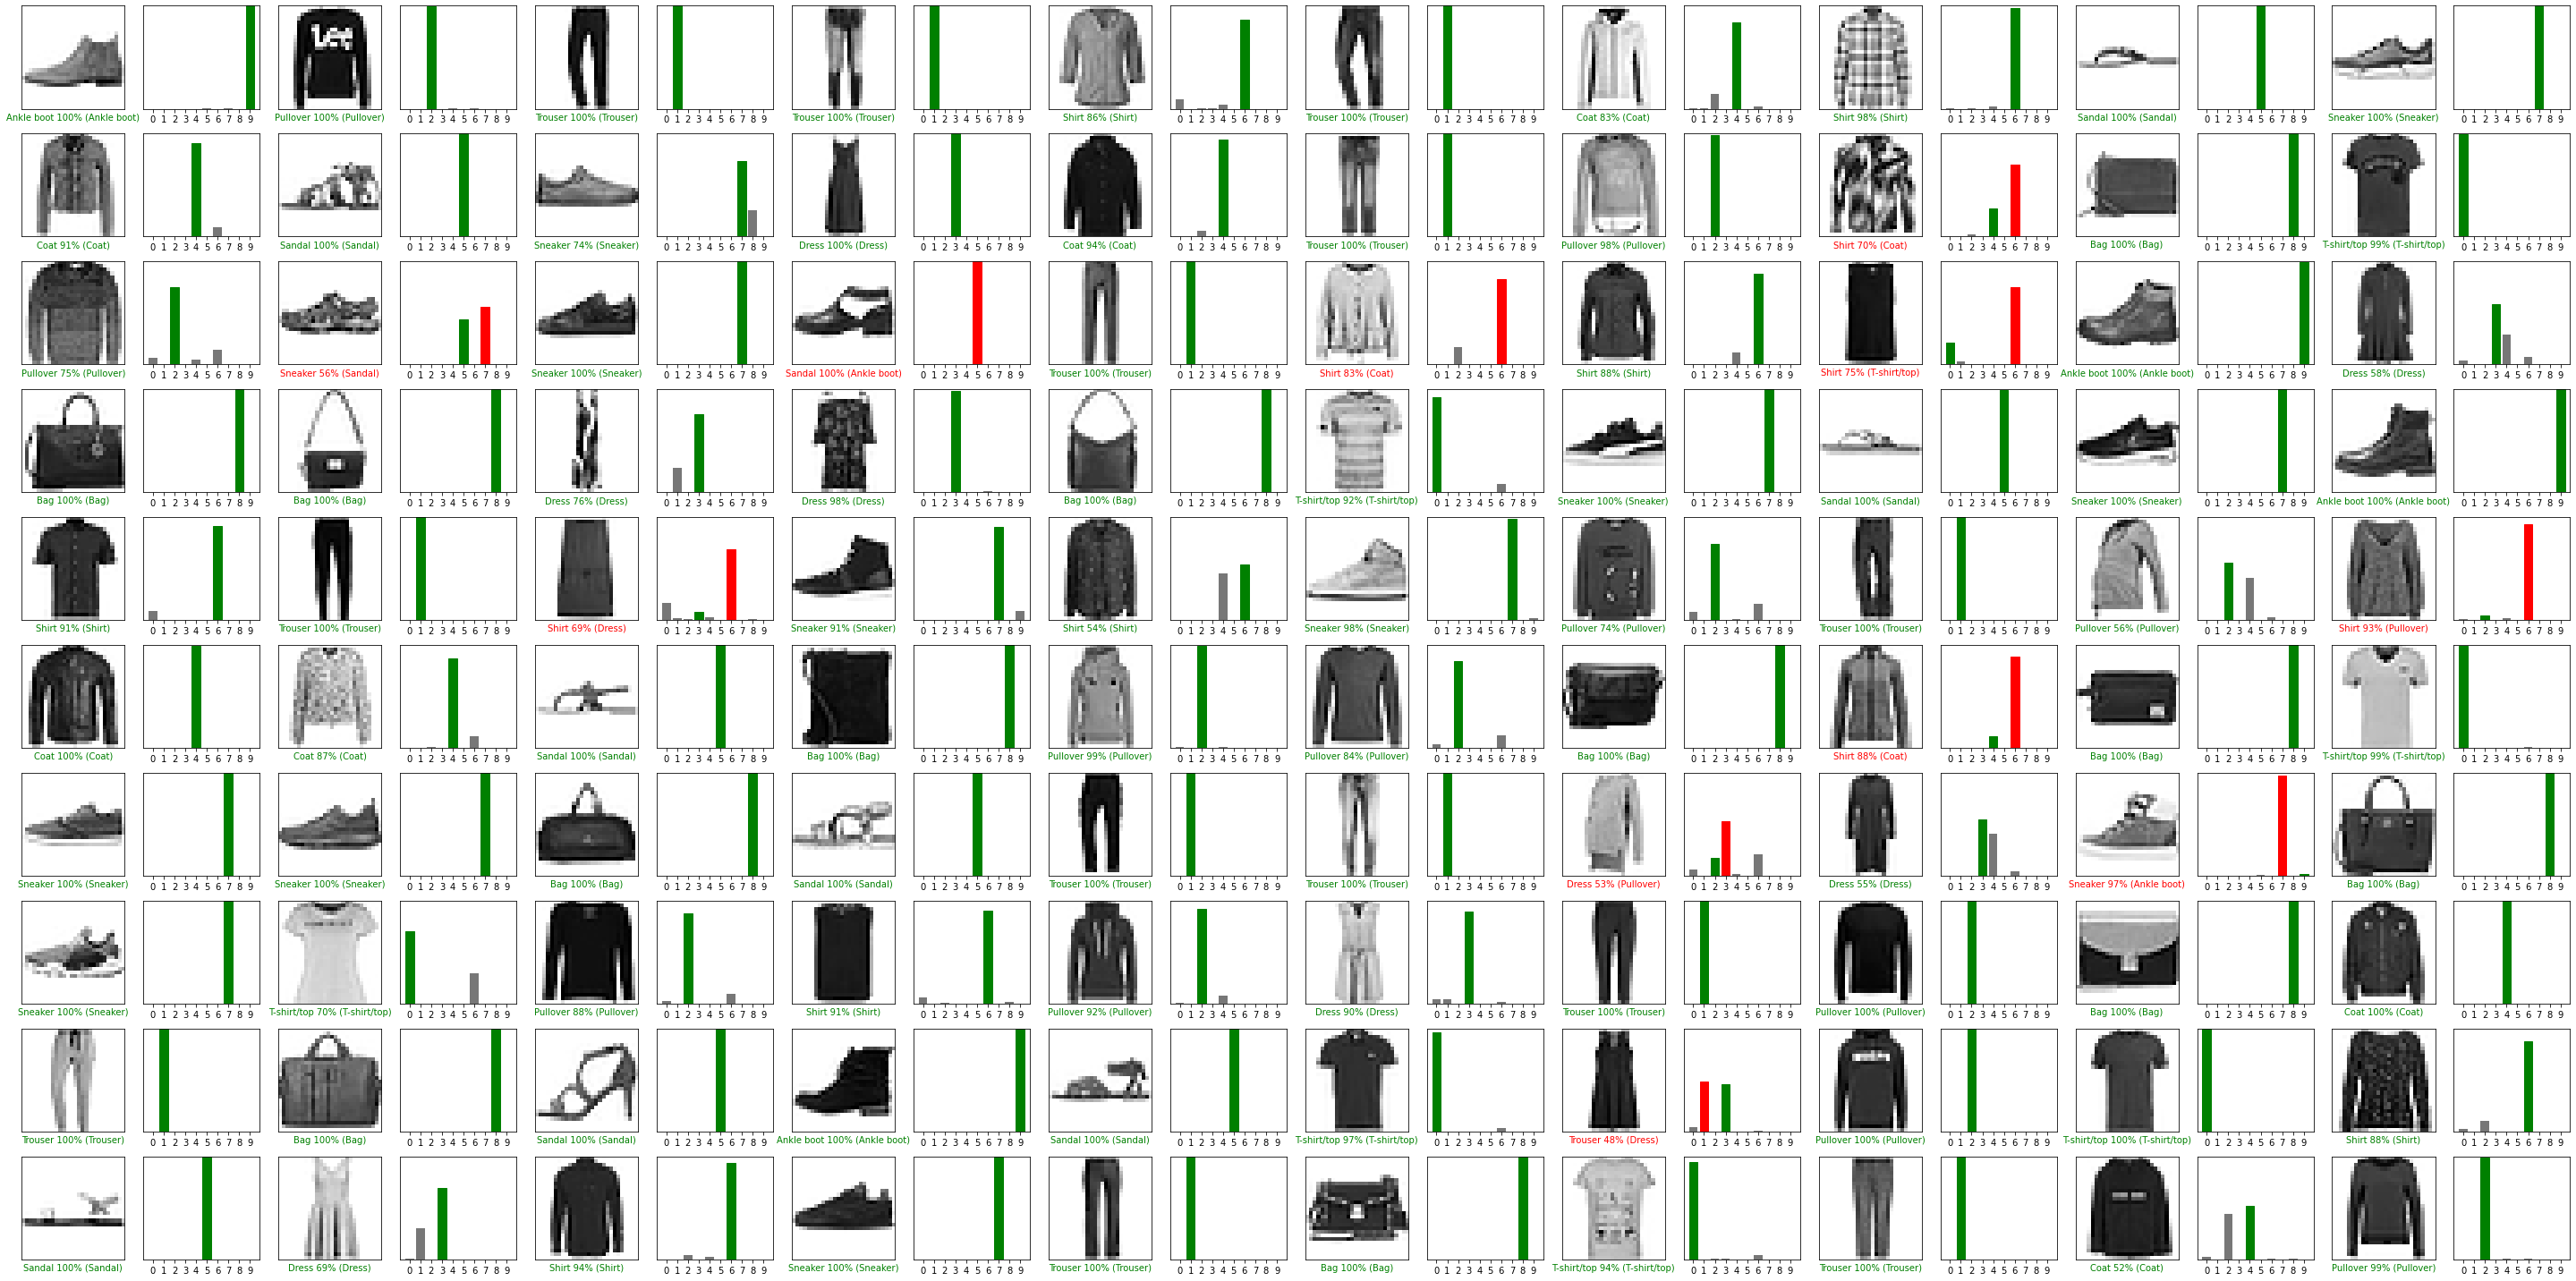

In [19]:
rows = 10
cols = 10

num_img = rows * cols
plt.figure(figsize = (2 * 2 * cols, 2 * rows))

for i in range(num_img):
    plt.subplot(rows, 2 * cols,  2 * i + 1)
    plot_img(i, predictions[i], test_lbl, test_img)
    plt.subplot(rows, 2 * cols, 2 * i + 2)
    plot_value_array(i, predictions[i], test_lbl)
plt.tight_layout()